# AI Machine Learning Practice 

# Informations

- Dataset: Music dataset

- Objectives: Classification

- Time Limits: 1 min

- Score: Classification Accuracy (Test Data)

- Please read all markdowns carefully 

- About Dataset: Music Style Data
    - 348 float type music features (frequency, tone, tempo, timbre...)
    - Label: Music Style
        - 1: Melancholy
        - 2: Romantic
        - 3: Rhythmical
- 죠교님이 해둔 코드 몇개는 바꾸면 안되나봐.

## [Step 0] Importing Packages

You must specify all the packages you use in this practice in the cell below.



In [169]:
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

## [Step 1] Read Data

Train dataset is in the 'data' directory


In [170]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib

import matplotlib.pyplot as plt
# Import the data using the file path
filepath1 = os.sep.join(data_path + ['music_train_data.csv'])
data = pd.read_csv(filepath1)
filepath2 = os.sep.join(data_path + ['music_test_data.csv'])
test_data = pd.read_csv(filepath2)

In [171]:
data.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f340,f341,f342,f343,f344,f345,f346,f347,f348,answer
0,-0.166614,0.284691,-0.011022,-1.028812,0.101653,0.498247,-0.314566,1.208697,-1.503008,-1.457764,...,2.136721,-1.193955,0.040614,1.127366,0.741521,-0.707730,0.077748,0.832992,-1.291423,2
1,-0.583950,0.651829,-1.754836,-0.512545,-1.063596,1.434039,-1.404162,-0.745222,0.054440,0.153028,...,-0.803444,-0.327357,1.022505,-1.083422,-0.714399,-1.407135,0.846917,-1.562645,0.365577,1
2,-0.214595,0.353967,0.749125,-0.123296,-0.809340,0.042847,-0.688971,-0.741502,0.059323,0.995969,...,0.423848,-0.200293,-0.265410,-1.182842,-0.416810,0.234092,-1.061020,-1.595486,-0.867771,1
3,-0.044177,0.151251,1.017266,-0.809429,-0.558230,-0.649047,-0.790528,-0.798548,1.471307,0.045307,...,0.601954,-0.092321,-1.319499,-0.673082,-0.816716,-4.172430,1.093709,1.106629,0.476974,1
4,0.779536,-0.761447,0.138536,2.406821,0.735203,-0.058044,0.358249,1.027844,-0.043828,-1.221248,...,-0.673082,-0.100535,-0.623208,1.571379,0.270780,-0.792427,-0.402796,1.349432,0.174976,2


In [172]:
print(data.shape)
print(data.dtypes)

(650, 349)
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
           ...   
f345      float64
f346      float64
f347      float64
f348      float64
answer      int64
Length: 349, dtype: object


In [173]:
#모든 결측치의 합을 더함. 결측치가 없는 것을 확인할 수 있음.
pd.isnull(data).sum().sum()

0

In [174]:
data['answer'].describe()

count    650.000000
mean       1.596923
std        0.684850
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: answer, dtype: float64

## [Step 2] Data Preprocessing

* Preprocessing Code below 
* You must explain your method in this markdown
* (Important) You must define transfrom function for test data

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='answer', ylabel='count'>

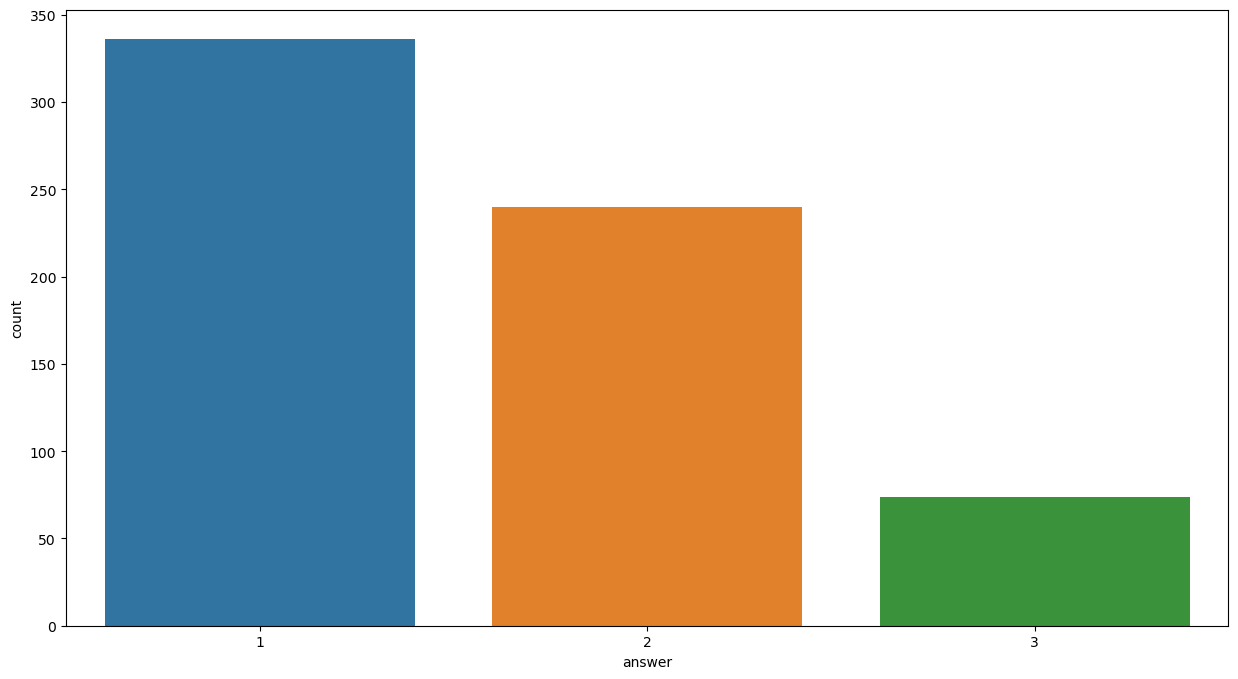

In [175]:
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(data['answer'])

#### 상관계수 분석

In [176]:
answer_corr = data.corr().abs()[-1:].unstack()
#내림차순으로 상관계수를 정렬한 후, 상위 10개의 Feature 확인
answer_corr.sort_values(kind="quicksort", ascending=False)[:31]

answer  answer    1.000000
f55     answer    0.528829
f25     answer    0.499611
f29     answer    0.483143
f53     answer    0.479233
f63     answer    0.470994
f35     answer    0.465304
f77     answer    0.459385
f49     answer    0.456644
f21     answer    0.446106
f309    answer    0.432933
f40     answer    0.422038
f39     answer    0.421808
f320    answer    0.419074
f59     answer    0.417458
f316    answer    0.414389
f45     answer    0.412193
f36     answer    0.401344
f347    answer    0.384805
f31     answer    0.378770
f153    answer    0.361140
f313    answer    0.332036
f343    answer    0.331786
f69     answer    0.281474
f310    answer    0.280139
f330    answer    0.254111
f323    answer    0.253777
f10     answer    0.250951
f286    answer    0.248008
f287    answer    0.245661
f80     answer    0.242606
dtype: float64

In [177]:
data_corr = data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
data_corr.drop(data_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = data_corr.drop(data_corr[data_corr['Correlation Coefficient'] == 1.0].index)

아래의 코드를 통해, feature 간에 상관계수는 몇몇개는 상당히 높다는 것을 확인할 수 있다.

In [178]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.5
#print(df_train_corr_nd.count)
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
348,f65,f66,0.999182
350,f245,f167,0.992357
352,f247,f169,0.991502
354,f246,f168,0.991359
356,f166,f244,0.991123
...,...,...,...
3314,f169,f49,0.500367
3316,f333,f173,0.500343
3318,f284,f25,0.500327
3320,f8,f217,0.500247


#### 편향도 확인 및 처리

상위10개의 편향도 확인 -> 상당히 높은 것을 확인할 수 있음. 

In [179]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
top_10_index = skewed_feats.sort_values(ascending=False)[:10]
print(top_10_index)
top_10_index = top_10_index.index



f65     25.295412
f66     25.096269
f13      9.453152
f116     5.048910
f14      5.025909
f28      4.898928
f203     4.161365
f202     4.017091
f195     3.938446
f200     3.505070
dtype: float64


/var/folders/w7/s0fpj10s56vggmksv5380b8r0000gn/T/ipykernel_71426/1606099996.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness


log 를 통해 어느정도 편향도가 해소되는 것을 확인할 수 있다.

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


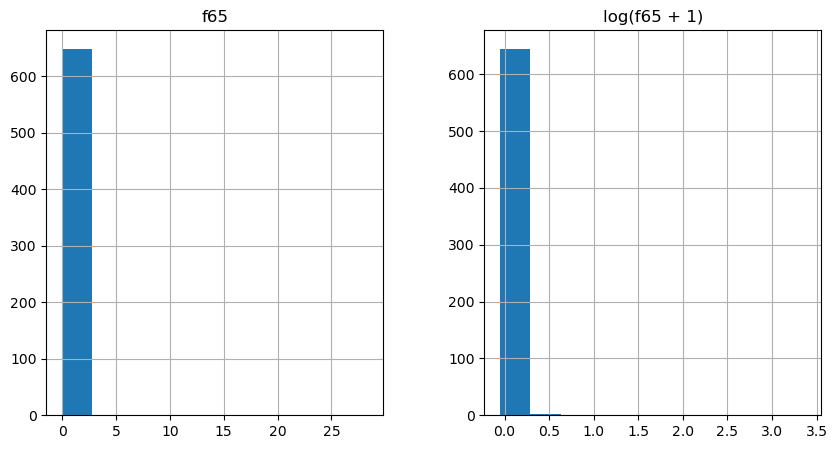

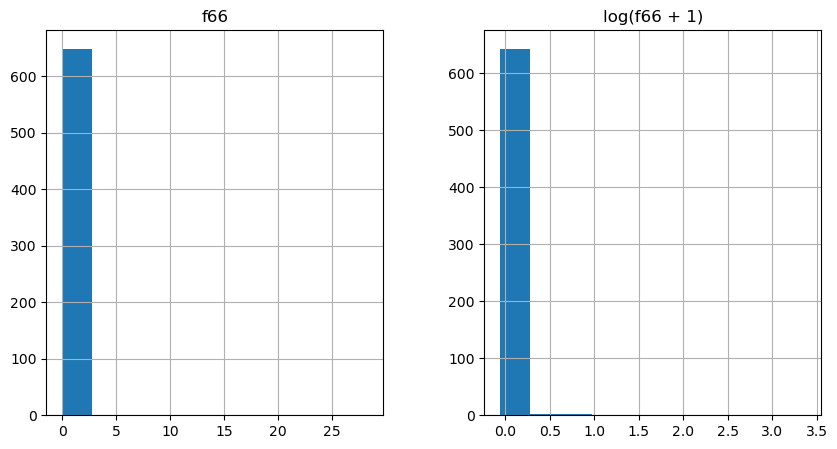

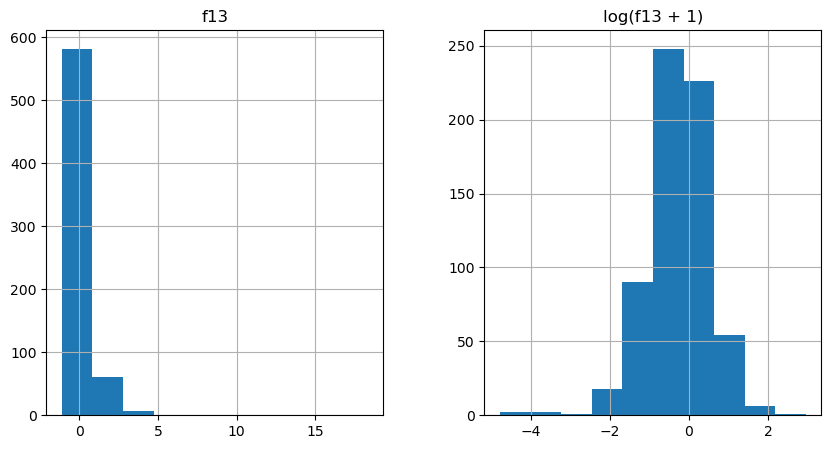

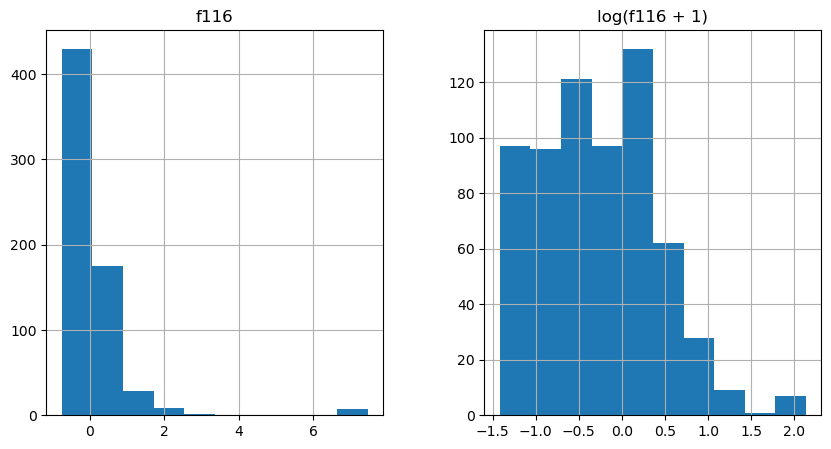

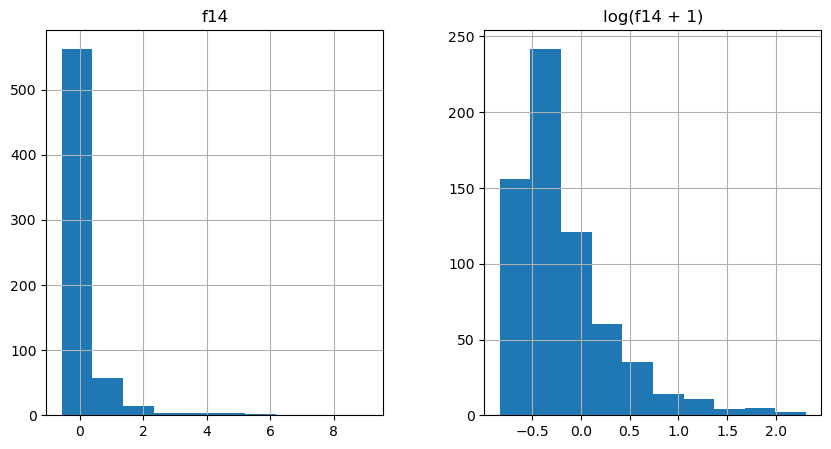

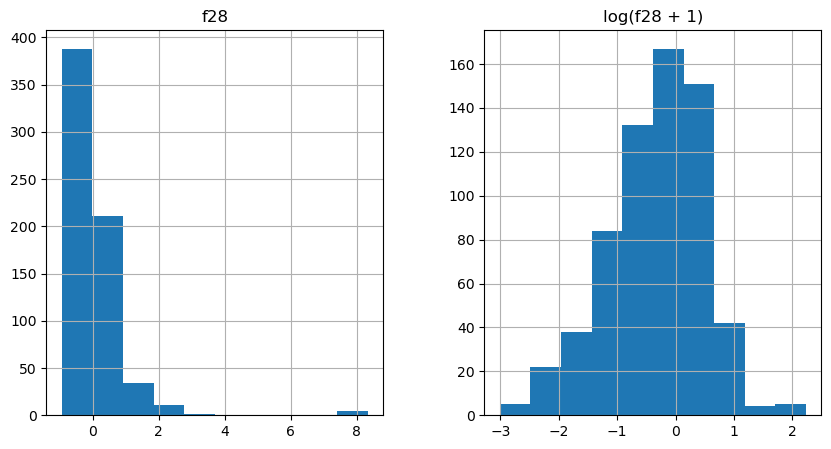

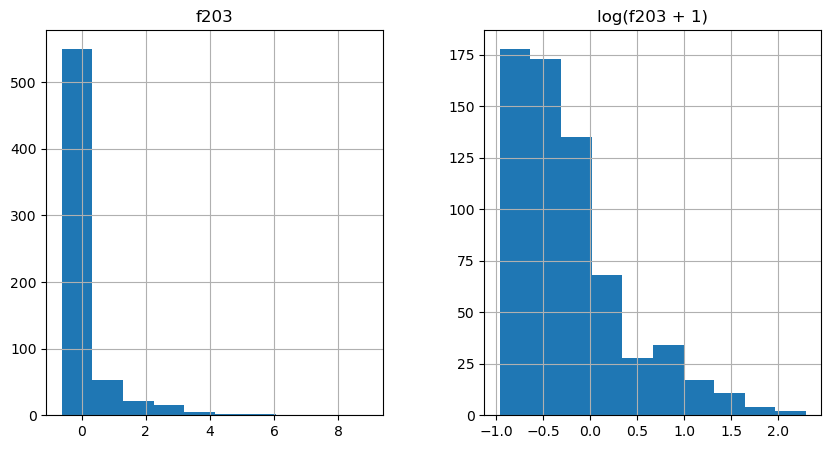

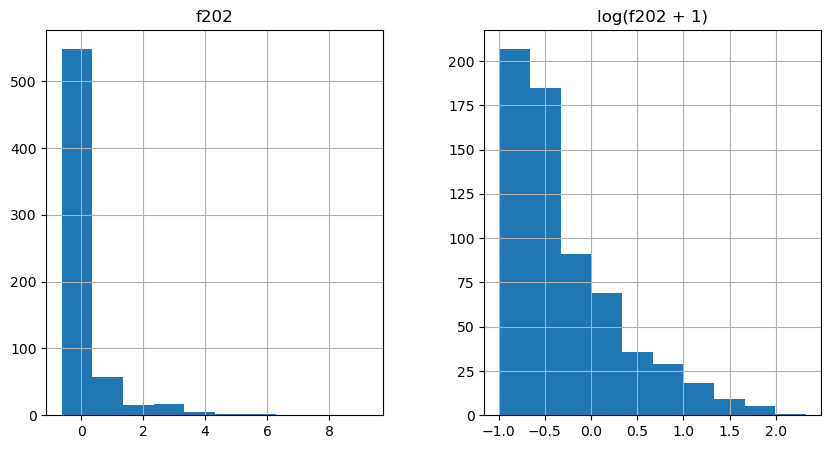

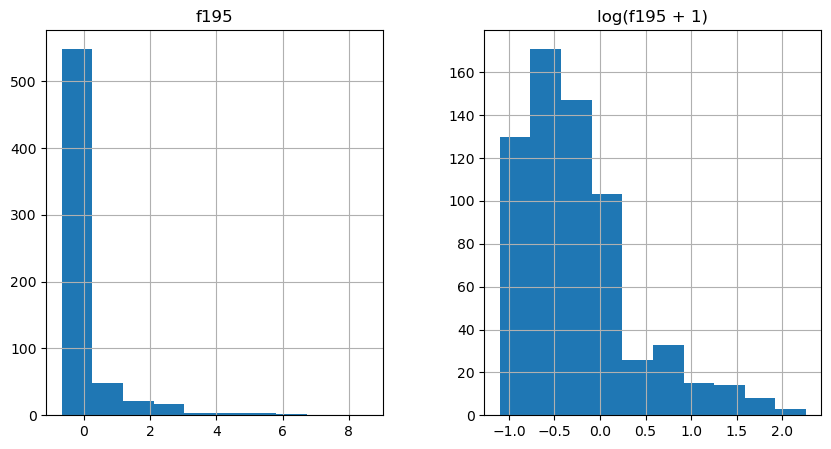

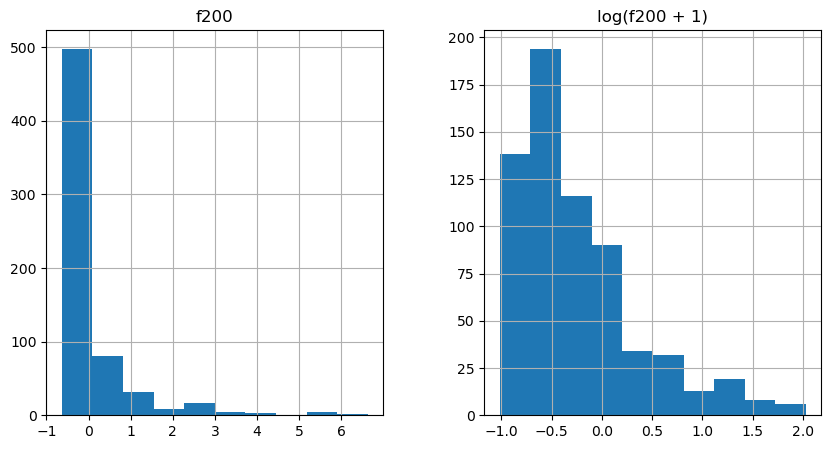

In [180]:
for i in top_10_index:
    matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
    prices = pd.DataFrame({ i:data[i], "log(" + i + " + 1)":np.log1p(data[i])})
    prices.hist() 

Log(x + 1)로 변형한 결과 Top10의 편향도는 물론이고, 전체적인 편향도가 낮아진 것을 확인할 수 있다.

In [181]:
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75].index

for i in skewed_feats:
    data[i] = np.log1p(data[i])

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))
print(skewed_feats.sort_values(ascending=False)[:10])

f65     20.720429
f66     17.661339
f14      1.703379
f277     1.405559
f204     1.401090
f203     1.398109
f202     1.396626
f200     1.371888
f278     1.346244
f274     1.343837
dtype: float64


/var/folders/w7/s0fpj10s56vggmksv5380b8r0000gn/T/ipykernel_71426/1438131618.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))


#### 정규화

정규화 작업은 아래의 데이터의 scale 을 확인한 뒤, 진행한다.

In [ ]:
# 조교님 예시코드 여기서 정규화 이후 편향도 확인해보면 될듯.
# # transform function
# # Do not change the function name
# # Sample Code - Min Max Scaling
# import warnings
# warnings.filterwarnings('ignore', module='sklearn')
# msc = MinMaxScaler()

# X_data = pd.DataFrame(msc.fit_transform(X_data),  # this is an np.array, not a dataframe.
#                     columns=X_data.columns)

# X_data.head(5)
# def transform_test(X_test_data):
#     X_test_data = msc.transform(X_test_data)
#     return X_test_data

In [182]:
pd.isnull(data).sum()

f1        106
f2          0
f3          0
f4        106
f5        103
         ... 
f345        0
f346      104
f347        0
f348        0
answer      0
Length: 349, dtype: int64

In [183]:
data = data.fillna(data.mean())

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


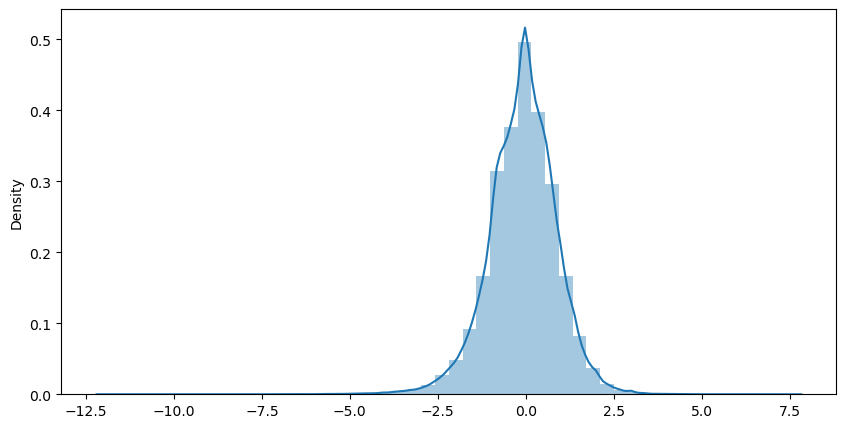

In [184]:
sns.distplot(data)
plt.show()

데이터의 평균이 유사해보이는 것을 확인할 수 있음 -> 그래도, 혹시모를 데이터 편향성을 위해 정규화 진행

In [185]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f340,f341,f342,f343,f344,f345,f346,f347,f348,answer
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.049959,0.008584,0.008183,-0.159057,0.131531,0.114346,-0.028488,-0.389138,-0.031464,-0.005901,...,-0.454994,-0.155701,0.009903,0.019381,-0.215628,0.006140,-0.184174,0.016084,-0.000650,1.596923
std,0.810972,1.009757,1.003693,0.952933,0.639464,0.584764,0.835734,1.047727,0.977971,0.989498,...,0.983825,0.954382,1.023392,0.990331,0.905154,1.013217,0.967834,0.988036,0.996245,0.684850
min,-5.287954,-2.607772,-3.092074,-5.460866,-3.910763,-3.545955,-5.042234,-5.775964,-2.947241,-2.328078,...,-1.900670,-4.684804,-3.130989,-2.640227,-5.769875,-4.172430,-6.540563,-3.482437,-3.877779,1.000000
25%,-0.098128,-0.741285,-0.641448,-0.484102,0.054695,-0.028123,-0.210588,-1.026805,-0.640792,-0.511622,...,-1.419505,-0.458475,-0.626120,-0.752772,-0.581117,-0.630762,-0.515496,-0.591307,-0.589563,1.000000
50%,0.186818,-0.085561,-0.125059,-0.159057,0.208806,0.186913,0.081581,-0.364858,-0.079813,0.198814,...,-0.582017,-0.155701,-0.113994,-0.163300,-0.178399,-0.013306,-0.184174,0.092563,0.076969,1.000000
75%,0.570595,0.691273,0.626981,0.411601,0.530153,0.468162,0.394874,0.368694,0.454957,0.662861,...,0.435843,0.496942,0.556908,0.870034,0.339754,0.701104,0.499036,0.753586,0.660879,2.000000
max,1.040288,2.765171,3.551567,1.862988,0.943586,1.109980,1.671413,2.198019,3.929802,2.805231,...,1.777601,1.716525,2.938023,3.782052,1.990313,3.108610,1.694336,2.049950,3.263902,3.000000


In [186]:
scaler_ = MinMaxScaler()
scaler_.fit(data)
minmax_scaled_ = scaler_.transform(data)

#### Feature selection

In [203]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LassoCV

In [202]:
features = data.columns[:-1]
X_data = data[features]
y_data = data['answer']
data.head(1)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f340,f341,f342,f343,f344,f345,f346,f347,f348,answer
0,-0.182258,0.284691,-0.011022,-0.159057,0.096812,0.404296,-0.377703,0.792403,-1.503008,-1.457764,...,1.143178,-0.155701,0.040614,1.127366,0.554759,-0.70773,0.074874,0.832992,-1.291423,2


In [204]:
alphas = [1, 0.5, 0.1, 0.01, 0.005 ,0.001, 0.0005,0.0001]
model_lasso = LassoCV(alphas=alphas,
                  max_iter=5e4,
                  cv=3).fit(X_data, y_data)

In [205]:
coef = pd.Series(model_lasso.coef_, index = X_data.columns)

In [206]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 145 variables and eliminated the other 203 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

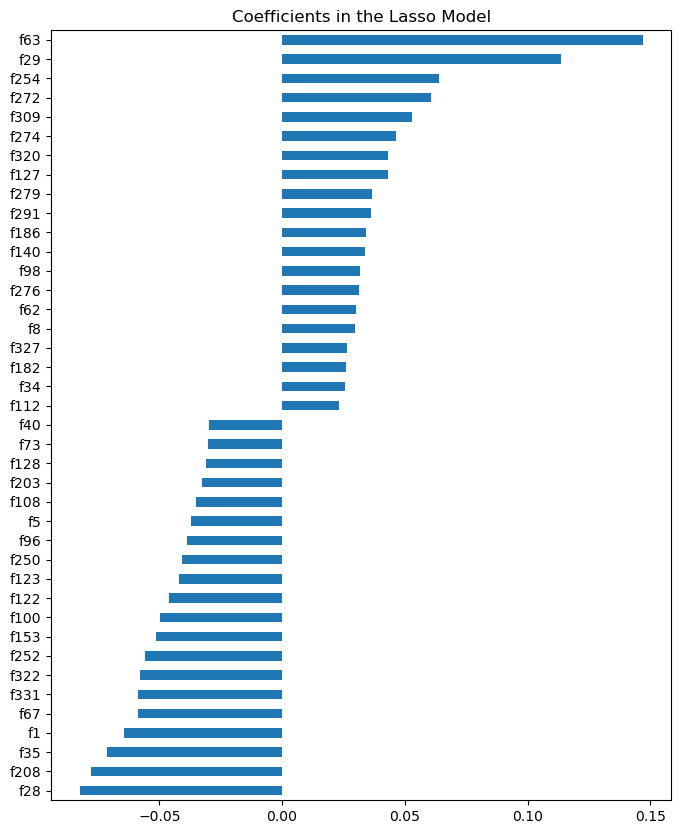

In [207]:
imp_coef = pd.concat([coef.sort_values().head(20),
                     coef.sort_values().tail(20)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

위에서 봤던 Feature 를 선택해서 진행

아까 상관계수 높은것도 다 추가.
Feature 특징확인 -> 여기서 추출한 feature들로 모델링 진행하는 거임.

In [189]:
# sns.pairplot(data, hue="answer",markers=["o", "s", "D"]) 
# plt.show()

## Model Training

- Pycaret colab을 통해 모델링 선택 -> 이후 하이퍼파라미터 튜닝도 진행하면 될듯.

1. Train-test split, cross validation -> 당연히 학습시 진행
2.  Error metric (confusion matrix, error charts) -> F1 score, Rmse 등 에러확인
3.  Hyperparameters -> Pycaret을 통해 얻어진 수치를 기반으로 진행하면 될듯.


* Training Code Below
* You must explain your method in this markdown
* (Important) Your model variable should be named 'model' !!! 

In [193]:
# Sample code - kNN Classification
model = KNeighborsClassifier(n_neighbors=3)

model = model.fit(X_data, y_data)

y_pred = model.predict(X_data)

## Check Accuracy 

* Check your Train data accuracy

In [194]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [195]:
print(accuracy(y_data, y_pred))

0.9138461538461539


## Analysis 

* Analyze your model's result
* You may use additional metrics (F1 Score, Confusion matrix) or visualize your results using plots
* Hint : PCA plot will help you understand the dataset (Which class is the most challenging class to classify?)
* Hint : You may also compare different models to choose the best model among classifiers what we learned in this semester

In [196]:
# Your code here

# Test data

* TA will check your model's test data accuracy
* (Important) Do not change the code below

In [197]:
filepath = os.sep.join( ['data', 'music_test_data.csv'])
t_data = pd.read_csv(filepath)
features = t_data.columns
X_t_data = t_data[features]
X_t_data = transform_test(X_t_data)
#결과는 Txt 형태로 진행하면 됨.
y_pred = model.predict(X_t_data)
np.savetxt('out.txt', y_pred, fmt='%d', delimiter='\n')